In [1]:
from numpy import *
from decimal import *
getcontext().prec = 28
# from pylab import *
import matplotlib
matplotlib.use('Agg')
from matplotlib.pyplot import *
style.use(u'ggplot')
%matplotlib inline

################################################################################
# Classes
################################################################################
class IzhNeuron:
  def __init__(self, label, a, b, c, d, v0, u0=None):
    self.label = label

    self.a = a
    self.b = b
    self.c = c
    self.d = d
	
    self.v = v0
    self.u = u0 if u0 is not None else b*v0

	
class IzhSim:
    def __init__(self, n, T, dt=0.1):
        self.neuron = n
        self.dt     = dt
        self.t      = t = arange(0, T+dt, dt)
        self.stim   = zeros(len(t))
        self.x      = 5
        self.y      = 140
        self.du     = lambda a, b, v, u: a*(b*v - u)
	
    def integrate(self, n=None):
        if n is None: n = self.neuron
        trace = zeros((3,len(self.t)))
        p = 0
        tau_p = 10
        for i, j in enumerate(self.stim):
        #       n.v += self.dt * (0.04*n.v**2 + self.x*n.v + self.y - n.u + self.stim[i])
            n.v += self.dt * 1/15.0 * ((n.v+60)*(n.v+50) - 20*n.u + 8*self.stim[i])  
        #       n.u += self.dt * self.du(n.a,n.b,n.v,n.u)
            n.u += self.dt * 0.044 * ( (n.v+55 ) - n.u )
            p += self.dt / tau_p * ((n.v > 0)*tau_p/self.dt - p )
            if n.v > 25:
                trace[0,i] = 30
                n.v        = -40
                n.u       += 50          
            else:
                trace[0,i] = n.v
                trace[1,i] = n.u
            trace[2,i] = p
        return trace


In [7]:
# Figure style
fontsize =18

matplotlib.rc('xtick', labelsize=fontsize)
matplotlib.rc('ytick', labelsize=fontsize)
matplotlib.rc('axes', labelsize = fontsize)
matplotlib.rc('axes', titlesize = fontsize)
matplotlib.rc('lines', linewidth=2)
matplotlib.rc('axes', facecolor = "white")

In [8]:
import re, csv, os, datetime, os, sys
today = datetime.date.today()
todayStr = '%04d%02d%02d' % (today.year, today.month, today.day)
DIRECTORY = os.path.expanduser("~/Dropbox/0000 - PhD/figures/"+todayStr+"/")
if not os.path.exists(DIRECTORY):
    os.makedirs(DIRECTORY)

## PLOT TONIC BURSTING PROTOCOL

271.75


/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:33: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/matplotlib/axes/_base.py:2724: MatplotlibDeprecationWarning: set_axis_bgcolor is deprecated.  Use set_facecolor instead.
  cbook.mplDeprecation)
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:41: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.
/Users/GP1514/.pyenv/versions/anaconda3-2.4.0/lib/python3.5/site-packages/ipykernel/__main__.py:59: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


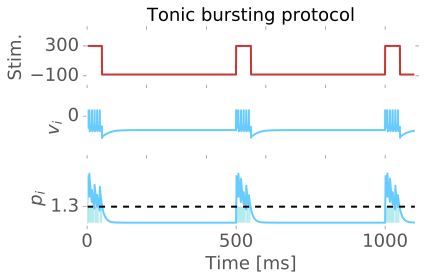

In [11]:
fig = figure(figsize=(6,4))
## (C) tonic bursting
sims=[]
dt = 0.25
bTh = 1.3 


n = IzhNeuron("", a=0.02, b=0.25, c=-50, d=2, v0=-70)
s = IzhSim(n, T=3000, dt=dt)
for i, t in enumerate(s.t):
    s.stim[i] = 300 if (t)%500<50 else -82
sims.append(s)


for i,s in enumerate(sims):
    res = s.integrate()
    ax  = subplot(3,1,2) # V
    ax1 = subplot(3,1,1) # stim
    ax2  = subplot(3,1,3) # p

    # bursting neurons
    bursting  = array(res[2]>bTh)

    
    ax.plot(s.t, res[0], label='membrane voltage [mV]', color="#66ccff")
    ax.set_xlim([0,1100])
    ax.set_ylim([-200, 80])
    ax.set_title(s.neuron.label)
    ax.set_xticklabels([])
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_ylabel(r'$v_i$')
    ax.set_axis_bgcolor((1, 1,1))
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
#     ax1.plot(s.t, ((s.stim - min(s.stim))/(max(s.stim) - min(s.stim)))*10, label='stimulation [pA]')
    ax1.plot(s.t, s.stim, label='stimulation [pA]', color="#cc3333")
    ax1.set_xlim([0,1100])
    ax1.set_ylim([-210,510])
    ax1.set_yticks([-100,300])
    ax1.set_axis_bgcolor((1, 1,1))
    ax1.set_xticklabels([])
    ax1.set_ylabel('Stim.')
    ax2.plot(s.t, array(res[2]),"#66ccff", s.t, ones(len(s.t))*bTh, 'k--')
    ax2.set_yticks([1.3])
    
#     ax.set_xlim([0,s.t[-1]])
#     ax2.set_xlim([0,s.t[-1]])
    
    ax2.set_xlim([0,1100])
    ax2.fill(s.t, bursting*bTh, facecolor='c', alpha=0.3,)
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_xlabel('Time [ms]')
    ax2.set_ylabel(r'$p_i$')
    ax2.set_axis_bgcolor((1, 1,1))
    ax2.set_xticks([0,500,1000])
    



#   ax.set_yticklabels([])

ax1.set_title('Tonic bursting protocol', y=1.08)
tight_layout()

# show()
savefig(DIRECTORY + 'bursting_protocol.pdf', bbox_inches='tight', pad_inches=0)
# print res[0, 4500]
print(sum(array(res[2])>bTh)*dt)

In [4]:
def dichotomy(eps, goal, nbiter=20, dt=0.25):
    nbiter = 0
    err = 1
    res = 0.0010
    mmin = 0
    mmax = 0.0010
    LTD = 0.005
    g0 = 5
    i=0
    c = 0.005
    while(err > eps):
        i += 1
        c = (mmax-mmin)/2.000000000 + mmin
        res, _ = computeLTD(c, g0, burstime, dt)
        if res < goal:
            mmax = c
            sign = 1
        else:
            mmin = c
            sign = -1
        err = abs(goal- res)
        
    print(c)         

In [11]:
print(bTh)
burstime = array(res[2]>bTh)
def computeLTD(LTD, V0, burstime, dt):
    V = V0
    res_v = []
    for iteration in range(100):
        for i in range(len(burstime)):
            if burstime[i]:
                V -= LTD*V0*dt
            res_v.append(V)
    return V, res_v    

LTD = dichotomy(1e-5, 5*0.87, dt)
_, res_v = computeLTD( 1.54e-5, 5.0, burstime, dt)

1.3
4.783868789672853e-06


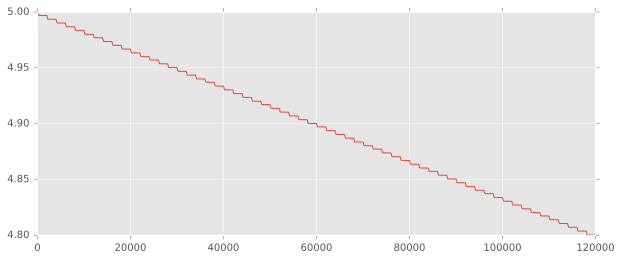

In [28]:
_, res_v = computeLTD( 1.54e-5, 5.0, burstime, dt)
plot(res_v[:120000])
# plot(burstime)

In [7]:
dichotomy(1e-5, 3*0.87)

1.56860351563e-05


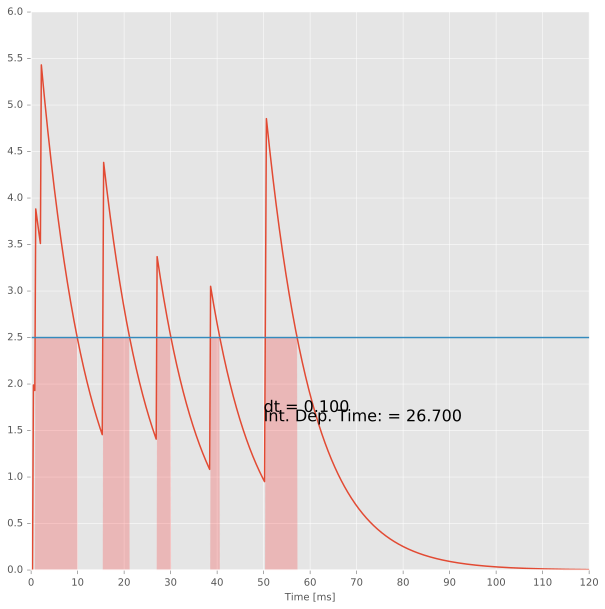

In [20]:
figure(figsize=(10,10))
## (C) tonic bursting
sims=[]
dt = 0.1
bTh = 2.5


n = IzhNeuron("Tonic Bursting protocol", a=0.02, b=0.25, c=-50, d=2, v0=-70)
s = IzhSim(n, T=120, dt=dt)
for i, t in enumerate(s.t):
  s.stim[i] = 200 if (t)%500<50 else -82
sims.append(s)


for i,s in enumerate(sims):
    res = s.integrate()
    ax2  = subplot(1,1,1)
    ax2.set_ylim([0,6])

    # bursting neurons
    bursting  = array(res[2]>bTh)

    ax2.plot(s.t, array(res[2]), s.t, ones(len(s.t))*bTh)
    
    ax2.set_xlim([0,s.t[-1]])

    ax2.fill(s.t, bursting*bTh, facecolor='red', alpha=0.2,)
    
    ax2.spines['right'].set_color('none')
    ax2.spines['top'].set_color('none')
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
#     ax2.set_yticks([0,1,2])
    ax2.set_xlabel('Time [ms]')
    ax2.text(50, 1.7, 'dt = %.3f' % dt, fontsize =16 )
    ax2.text(50, 1.6, 'Int. Dep. Time: = %.3f' % (sum(array(res[2])>bTh)*dt), fontsize =16 )

#   ax.set_yticklabels([])
savefig(DIRECTORY + 'integration_dt%.3f.pdf' % dt)
show()

# print res[0, 4500]


In [9]:
649%500

149

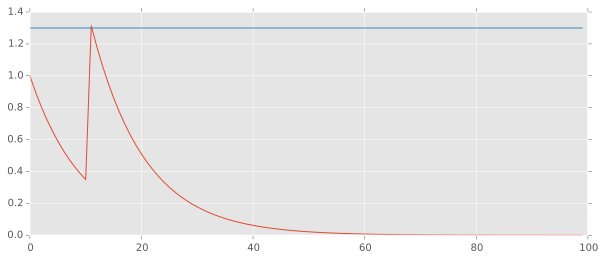

In [10]:
pList = []
p=0
sp = zeros(100)
sp[0]=1
sp[11]=1

for i in range(100):
    p += 1 / 10.0 * (sp[i] - p )
    pList.append(p*10)
    
plot(pList)
plot(np.arange(0, len(pList),1), 1.3*ones(len(pList)))

In [11]:
12.98/10

1.298

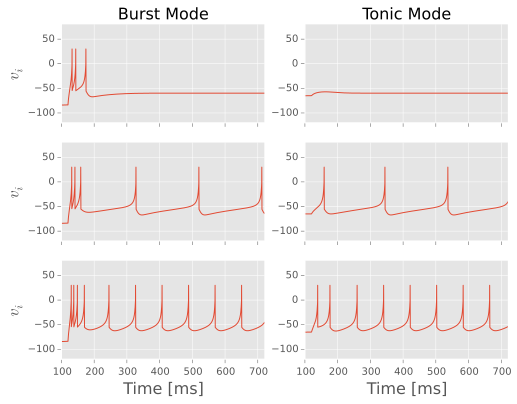

In [12]:
figure(figsize=(8,6))
fontsize=16
## (C) tonic bursting

dt = 0.25
bTh = 1.3 


n = IzhNeuron("Burst Mode", a=0.02, b=0.25, c=-50, d=2, v0=-70)
n2 = IzhNeuron("Activity states", a=0.02, b=0.25, c=-50, d=2, v0=-70)
s1 = IzhSim(n, T=1000, dt=dt)
s2 = IzhSim(n, T=1000, dt=dt)
s3 = IzhSim(n, T=1000, dt=dt)
s4 = IzhSim(n, T=1000, dt=dt)
s5 = IzhSim(n, T=1000, dt=dt)
s6 = IzhSim(n, T=1000, dt=dt)

for i, t in enumerate(s1.t):
    s1.stim[i] = 30 if (t)>120 else -350
    s2.stim[i] = 30 if (t)>120 else 0
    s3.stim[i] = 50 if (t)>120 else -350
    s4.stim[i] = 50 if (t)>120 else 0
    s5.stim[i] = 90 if (t)>120 else -350
    s6.stim[i] = 90 if (t)>120 else 0
    
res = s1.integrate()
res2 = s2.integrate()
res3 = s3.integrate()
res4 = s4.integrate()
res5 = s5.integrate()
res6 = s6.integrate()
ax  = subplot(3,2,1)
ax2  = subplot(3,2,2)
ax3  = subplot(3,2,3)
ax4  = subplot(3,2,4)
ax5  = subplot(3,2,5)
ax6  = subplot(3,2,6)

ax.set_title('Burst Mode', fontsize= fontsize)
ax2.set_title('Tonic Mode', fontsize= fontsize)
ax.plot(s1.t, res[0], label='membrane voltage [mV]')
ax2.plot(s2.t, res2[0], label='membrane voltage [mV]')
ax3.plot(s3.t, res3[0], label='membrane voltage [mV]')
ax4.plot(s4.t, res4[0], label='membrane voltage [mV]')
ax5.plot(s5.t, res5[0], label='membrane voltage [mV]')
ax6.plot(s6.t, res6[0], label='membrane voltage [mV]')

ax.set_xlim([100,720])
ax2.set_xlim([100,720])
ax3.set_xlim([100,720])
ax4.set_xlim([100,720])
ax5.set_xlim([100,720])
ax6.set_xlim([100,720])


ax.set_ylim([-120, 80])
ax2.set_ylim([-120, 80])
ax3.set_ylim([-120, 80])
ax4.set_ylim([-120, 80])
ax5.set_ylim([-120, 80])
ax6.set_ylim([-120, 80])
# ax.set_title(s1.neuron.label, fontsize=fontsize)
ax.set_xticklabels([])
ax2.set_xticklabels([])
ax3.set_xticklabels([])
ax4.set_xticklabels([])


ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax2.spines['right'].set_color('none')
ax2.spines['top'].set_color('none')
ax2.xaxis.set_ticks_position('bottom')
ax2.yaxis.set_ticks_position('left')

ax3.spines['right'].set_color('none')
ax3.spines['top'].set_color('none')
ax3.xaxis.set_ticks_position('bottom')
ax3.yaxis.set_ticks_position('left')

ax4.spines['right'].set_color('none')
ax4.spines['top'].set_color('none')
ax4.xaxis.set_ticks_position('bottom')
ax4.yaxis.set_ticks_position('left')

ax5.spines['right'].set_color('none')
ax5.spines['top'].set_color('none')
ax5.xaxis.set_ticks_position('bottom')
ax5.yaxis.set_ticks_position('left')

ax6.spines['right'].set_color('none')
ax6.spines['top'].set_color('none')
ax6.xaxis.set_ticks_position('bottom')
ax6.yaxis.set_ticks_position('left')

ax6.set_xlabel('Time [ms]', fontsize=fontsize)
ax5.set_xlabel('Time [ms]', fontsize=fontsize)
# ax2.set_ylabel(r'$v_i$', fontsize=fontsize)
ax.set_ylabel(r'$v_i$', fontsize=fontsize)
ax3.set_ylabel(r'$v_i$', fontsize=fontsize)
ax5.set_ylabel(r'$v_i$', fontsize=fontsize)

#   ax.set_yticklabels([])
# tight_layout()
savefig(DIRECTORY + 'sp_b_2.pdf')

show()
